In [1]:

from SimPEG import*
import SimPEG.PF as PF

cs = 0.2
rad = 2.
hxind = [(cs, 21)]
hyind = [(cs, 21)]
hzind = [(cs, 21)]
mesh = Mesh.TensorMesh([hxind, hyind, hzind], 'CCC')

rho = 0.5
ndv = -100

# Get cells inside the sphere
sph_ind = PF.MagAnalytics.spheremodel(mesh, 0., 0., 0., rad)

# Adjust susceptibility for volume difference
Vratio = (4./3.*np.pi*rad**3.) / (np.sum(sph_ind)*cs**3.)
model = np.ones(mesh.nC)*rho*Vratio

model = model[sph_ind]

actvMap = Maps.InjectActiveCells(mesh, sph_ind, ndv)
# Creat reduced identity map
idenMap = Maps.IdentityMap(nP=int(sum(sph_ind)))

# Create plane of observations
xr = np.linspace(-20, 20, 21)
yr = np.linspace(-20, 20, 21)
X, Y = np.meshgrid(xr, yr)

# Move obs plane 2 radius away from sphere
Z = np.ones((xr.size, yr.size))*2.*rad
locXyz = np.c_[Utils.mkvc(X), Utils.mkvc(Y), Utils.mkvc(Z)]
ndata = locXyz.shape[0]
rxLoc = PF.BaseGrav.RxObs(locXyz)
srcField = PF.BaseGrav.SrcField([rxLoc])
survey = PF.BaseGrav.LinearSurvey(srcField)

prob = PF.Gravity.GravityIntegral(mesh, mapping=idenMap,
                                     actInd=sph_ind, forwardOnly=True,
                                     rtype='xyz')

survey.pair(prob)

    #def test_ana_forward(self):

d = prob.fields(model)

dgx = d[0:ndata]
dgy = d[ndata:2*ndata]
dgz = d[2*ndata:]

prob = PF.Gravity.GravityIntegral(mesh, mapping=idenMap,
                                     actInd=sph_ind, forwardOnly=True,
                                     rtype='z')
survey.pair(prob)
dz = prob.fields(model)

gxa, gya, gza = PF.GravAnalytics.GravSphereFreeSpace(locXyz[:, 0], locXyz[:, 1], locXyz[:, 2], rad, 0, 0, 0, rho)


#dpred = survey.projectFieldsAsVector(B)
#err = np.linalg.norm(dpred-np.r_[bxa, bya, bza])/np.linalg.norm(np.r_[bxa, bya, bza])
#self.assertTrue(err < 0.08)

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    
Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
Done 40.0 %
Done 50.0 %
Done 60.0 %
Done 70.0 %
Done 80.0 %
Done 90.0 %
Done 100% ...forward operator completed!!

Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
Done 40.0 %
Done 50.0 %
Done 60.0 %
Done 70.0 %
Done 80.0 %
Done 90.0 %
Done 100% ...forward operator completed!!



In [2]:
err_xyz = np.linalg.norm(d-np.r_[gxa, gya, gza])/np.linalg.norm(np.r_[gxa, gya, gza])
err_tmi = np.linalg.norm(gza-dz)/np.linalg.norm(gza)
print err_xyz, err_tmi,

0.000422513743624 0.000536500198017


Populating the interactive namespace from numpy and matplotlib


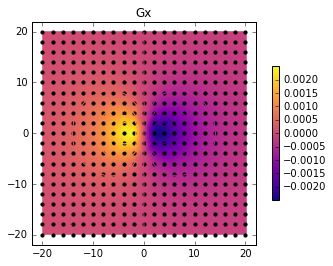

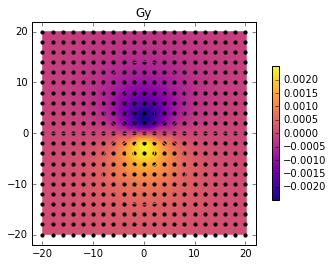

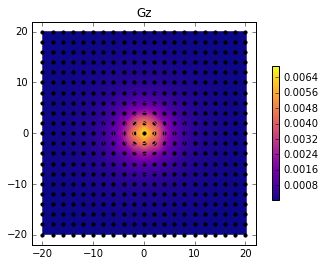

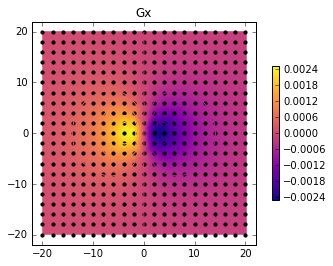

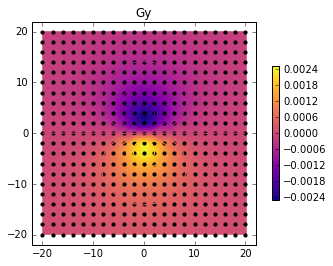

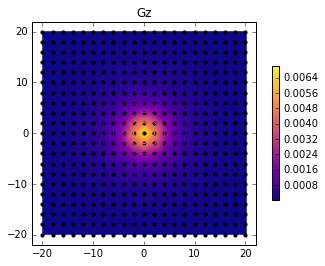

In [3]:
%pylab inline
fig = PF.Gravity.plot_obs_2D(locXyz,dgx,varstr='Gx')
fig = PF.Gravity.plot_obs_2D(locXyz,dgy,varstr='Gy')
fig = PF.Gravity.plot_obs_2D(locXyz,dgz,varstr='Gz')

fig = PF.Gravity.plot_obs_2D(locXyz,gxa,varstr='Gx')
fig = PF.Gravity.plot_obs_2D(locXyz,gya,varstr='Gy')
fig = PF.Gravity.plot_obs_2D(locXyz,gza,varstr='Gz')